## Problem 1:

### Approximate the following function:
$\Large f ( x ) = 3x^2 + 4x - 9 $


### Steps:
1. Randomly generate the data. Generate at least 10,000 values for $x \in [-100,100]$
2. Plot the function
3. Design a feed-forward network with 2 or more hidden layers. Choose the # of hidden units in each layer (what are the size of input and output layers?)
4. Train the model (What loss function will be suitable here?)
5. Generate a test data and present the test accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

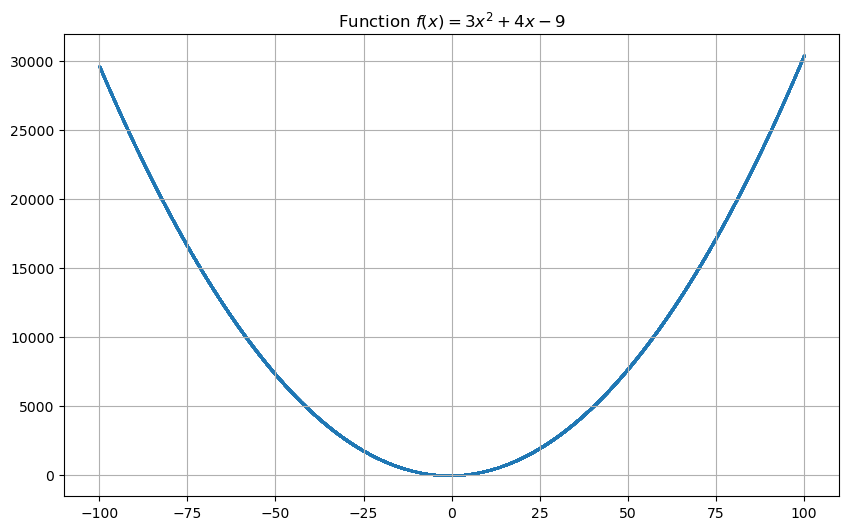

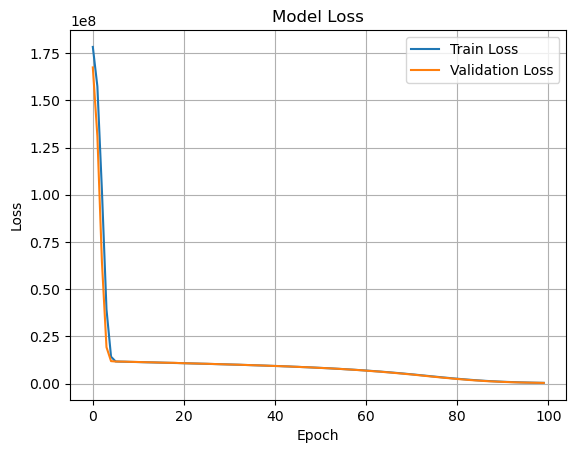

In [2]:
x = np.linspace(-100, 100, 10000)
y = 3*x**2 + 4*x - 9

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=1)
plt.title('Function $f(x) = 3x^2 + 4x - 9$')
plt.grid(True)
plt.show()

X = x.reshape(-1, 1)  
Y = y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_dim=1, activation='relu'), 
    Dense(64, activation='relu'),               
    Dense(1)                                    
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0, validation_split=0.2)

test_loss = model.evaluate(X_test, Y_test, verbose=0)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Problem 2:

### Feedforward Network
- Hidden layer 1
- Input size 784 [28X28] image
- Hidden layer units 500
- Output size 10
- Other Hyperparameters:
 - num_epochs = 5
 - batch_size = 100
 - learning_rate = 0.001

### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings

In [3]:
import torch 
import torch.nn as nn
import numpy as np


import torchvision
import torchvision.transforms as transforms

In [4]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Defining the network

In [14]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.0):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

### Loading the datasets

<i> 
#### Note: If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work </i>

In [15]:
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

In [16]:
test_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=False, 
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, shuffle=True)

##### Display samples

8


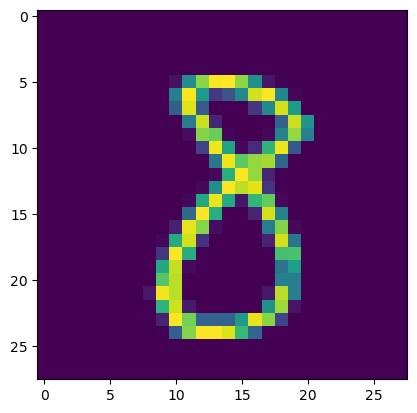

In [17]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
 
    plt.imshow(images[0].reshape((28,28)))
    break

In [18]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

### Train the model

In [22]:
num_batches = len(train_loader)
for epoch in range(num_epochs):
    
    for batch_index, (input_images, digit_labels) in enumerate(train_loader):
        
        input_images = input_images.view(-1, 784)  # 28*28 = 784
        predictions = model(input_images)
        loss_value = criterion(predictions, digit_labels)
        optimizer.zero_grad()
        loss_value.backward()
        
        optimizer.step()
        if (batch_index + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_index + 1}/{num_batches}], Loss: {loss_value.item():.4f}')
        

Epoch [1/5], Batch [100/600], Loss: 0.2958
Epoch [1/5], Batch [200/600], Loss: 0.2588
Epoch [1/5], Batch [300/600], Loss: 0.3463
Epoch [1/5], Batch [400/600], Loss: 0.1164
Epoch [1/5], Batch [500/600], Loss: 0.1517
Epoch [1/5], Batch [600/600], Loss: 0.1265
Epoch [2/5], Batch [100/600], Loss: 0.1035
Epoch [2/5], Batch [200/600], Loss: 0.0715
Epoch [2/5], Batch [300/600], Loss: 0.0880
Epoch [2/5], Batch [400/600], Loss: 0.1254
Epoch [2/5], Batch [500/600], Loss: 0.1180
Epoch [2/5], Batch [600/600], Loss: 0.0312
Epoch [3/5], Batch [100/600], Loss: 0.0466
Epoch [3/5], Batch [200/600], Loss: 0.0210
Epoch [3/5], Batch [300/600], Loss: 0.0378
Epoch [3/5], Batch [400/600], Loss: 0.0490
Epoch [3/5], Batch [500/600], Loss: 0.0443
Epoch [3/5], Batch [600/600], Loss: 0.1038
Epoch [4/5], Batch [100/600], Loss: 0.0818
Epoch [4/5], Batch [200/600], Loss: 0.0231
Epoch [4/5], Batch [300/600], Loss: 0.0093
Epoch [4/5], Batch [400/600], Loss: 0.0750
Epoch [4/5], Batch [500/600], Loss: 0.0140
Epoch [4/5]

#### Taking 4 samples from the test set 
- display the image
- print the true label
- print the output probability distribution
- print the predicted class

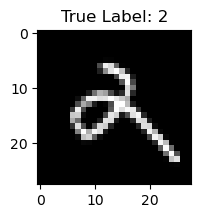

Sample 1:
True Label: 2
Output Probability Distribution: [8.3176550e-05 2.0012695e-03 2.3994748e-01 4.1971840e-02 1.5981732e-01
 5.8902960e-02 2.6687511e-04 1.2941244e-03 1.8446364e-02 4.7726852e-01]
Predicted Class: 9



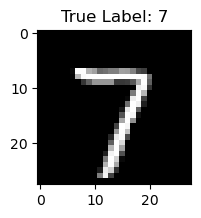

Sample 2:
True Label: 7
Output Probability Distribution: [3.5801222e-08 6.0188817e-08 3.6179426e-06 8.4652485e-05 1.8339787e-12
 6.9545889e-09 1.2400495e-12 9.9991119e-01 3.8456534e-08 5.3305143e-07]
Predicted Class: 7



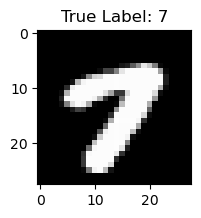

Sample 3:
True Label: 7
Output Probability Distribution: [7.6789235e-12 5.4137831e-12 6.3111429e-07 7.4793270e-06 2.6014092e-08
 9.1689885e-11 7.0158506e-16 9.9996459e-01 2.4050812e-05 3.2288606e-06]
Predicted Class: 7



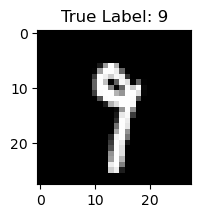

Sample 4:
True Label: 9
Output Probability Distribution: [1.7733497e-06 2.1784198e-04 6.0011246e-07 1.3726941e-04 2.0633146e-04
 1.5021200e-06 4.4181769e-10 2.7648937e-03 1.6155012e-05 9.9665362e-01]
Predicted Class: 9



In [23]:
import torch

# Ensure the model is in evaluation mode
model.eval()

# Use torch.no_grad to avoid tracking gradients during inference
with torch.no_grad():
    # Iterate over the test data loader
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs.data, 1)
        
        for i in range(4):
            plt.figure(figsize=(2,2))
            plt.imshow(images[i].reshape(28, 28).cpu().numpy(), cmap='gray')
            plt.title(f'True Label: {labels[i]}')
            plt.show()
            
            print(f'Sample {i+1}:')
            print(f'True Label: {labels[i].item()}')
            print('Output Prob:', probabilities[i].cpu().numpy())
            print(f'Predicted Class: {predicted[i].item()}\n')
    
        break
